In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator

sns.set_theme(
    context='notebook',
    style='ticks',
    font='sans-serif',
    font_scale=1.0,
    color_codes=True,
    rc={'figure.dpi':300},
)

def process_tfevents_file(file_path):
    """
    Reads a TensorFlow events file using tensorboard and prints scalar summaries.

    Parameters:
    - file_path: Path to the TensorFlow events file.
    """
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist.")
        return
    
    # Initialize an EventAccumulator with the file path
    ea = event_accumulator.EventAccumulator(file_path,
        size_guidance={  # See the constructor for size_guidance details
            event_accumulator.SCALARS: 0,  # 0 means load all
        })

    # Load the events from the file
    ea.Reload()

    # Get and print scalar summaries
    return ea

In [70]:
tfevents = {
    "Full FT": "/Users/Matey/project/MTRec-RecSys/lightning_logs/bert_recommender/version_44/events.out.tfevents.1719388932.gcn46.local.snellius.surf.nl.1328889.0",
    "LoRA": "/Users/Matey/project/MTRec-RecSys/lightning_logs/bert_recommender/version_45/events.out.tfevents.1719389049.gcn50.local.snellius.surf.nl.273107.0"
}

events = {key: process_tfevents_file(tfevent) for key, tfevent in tfevents.items()}

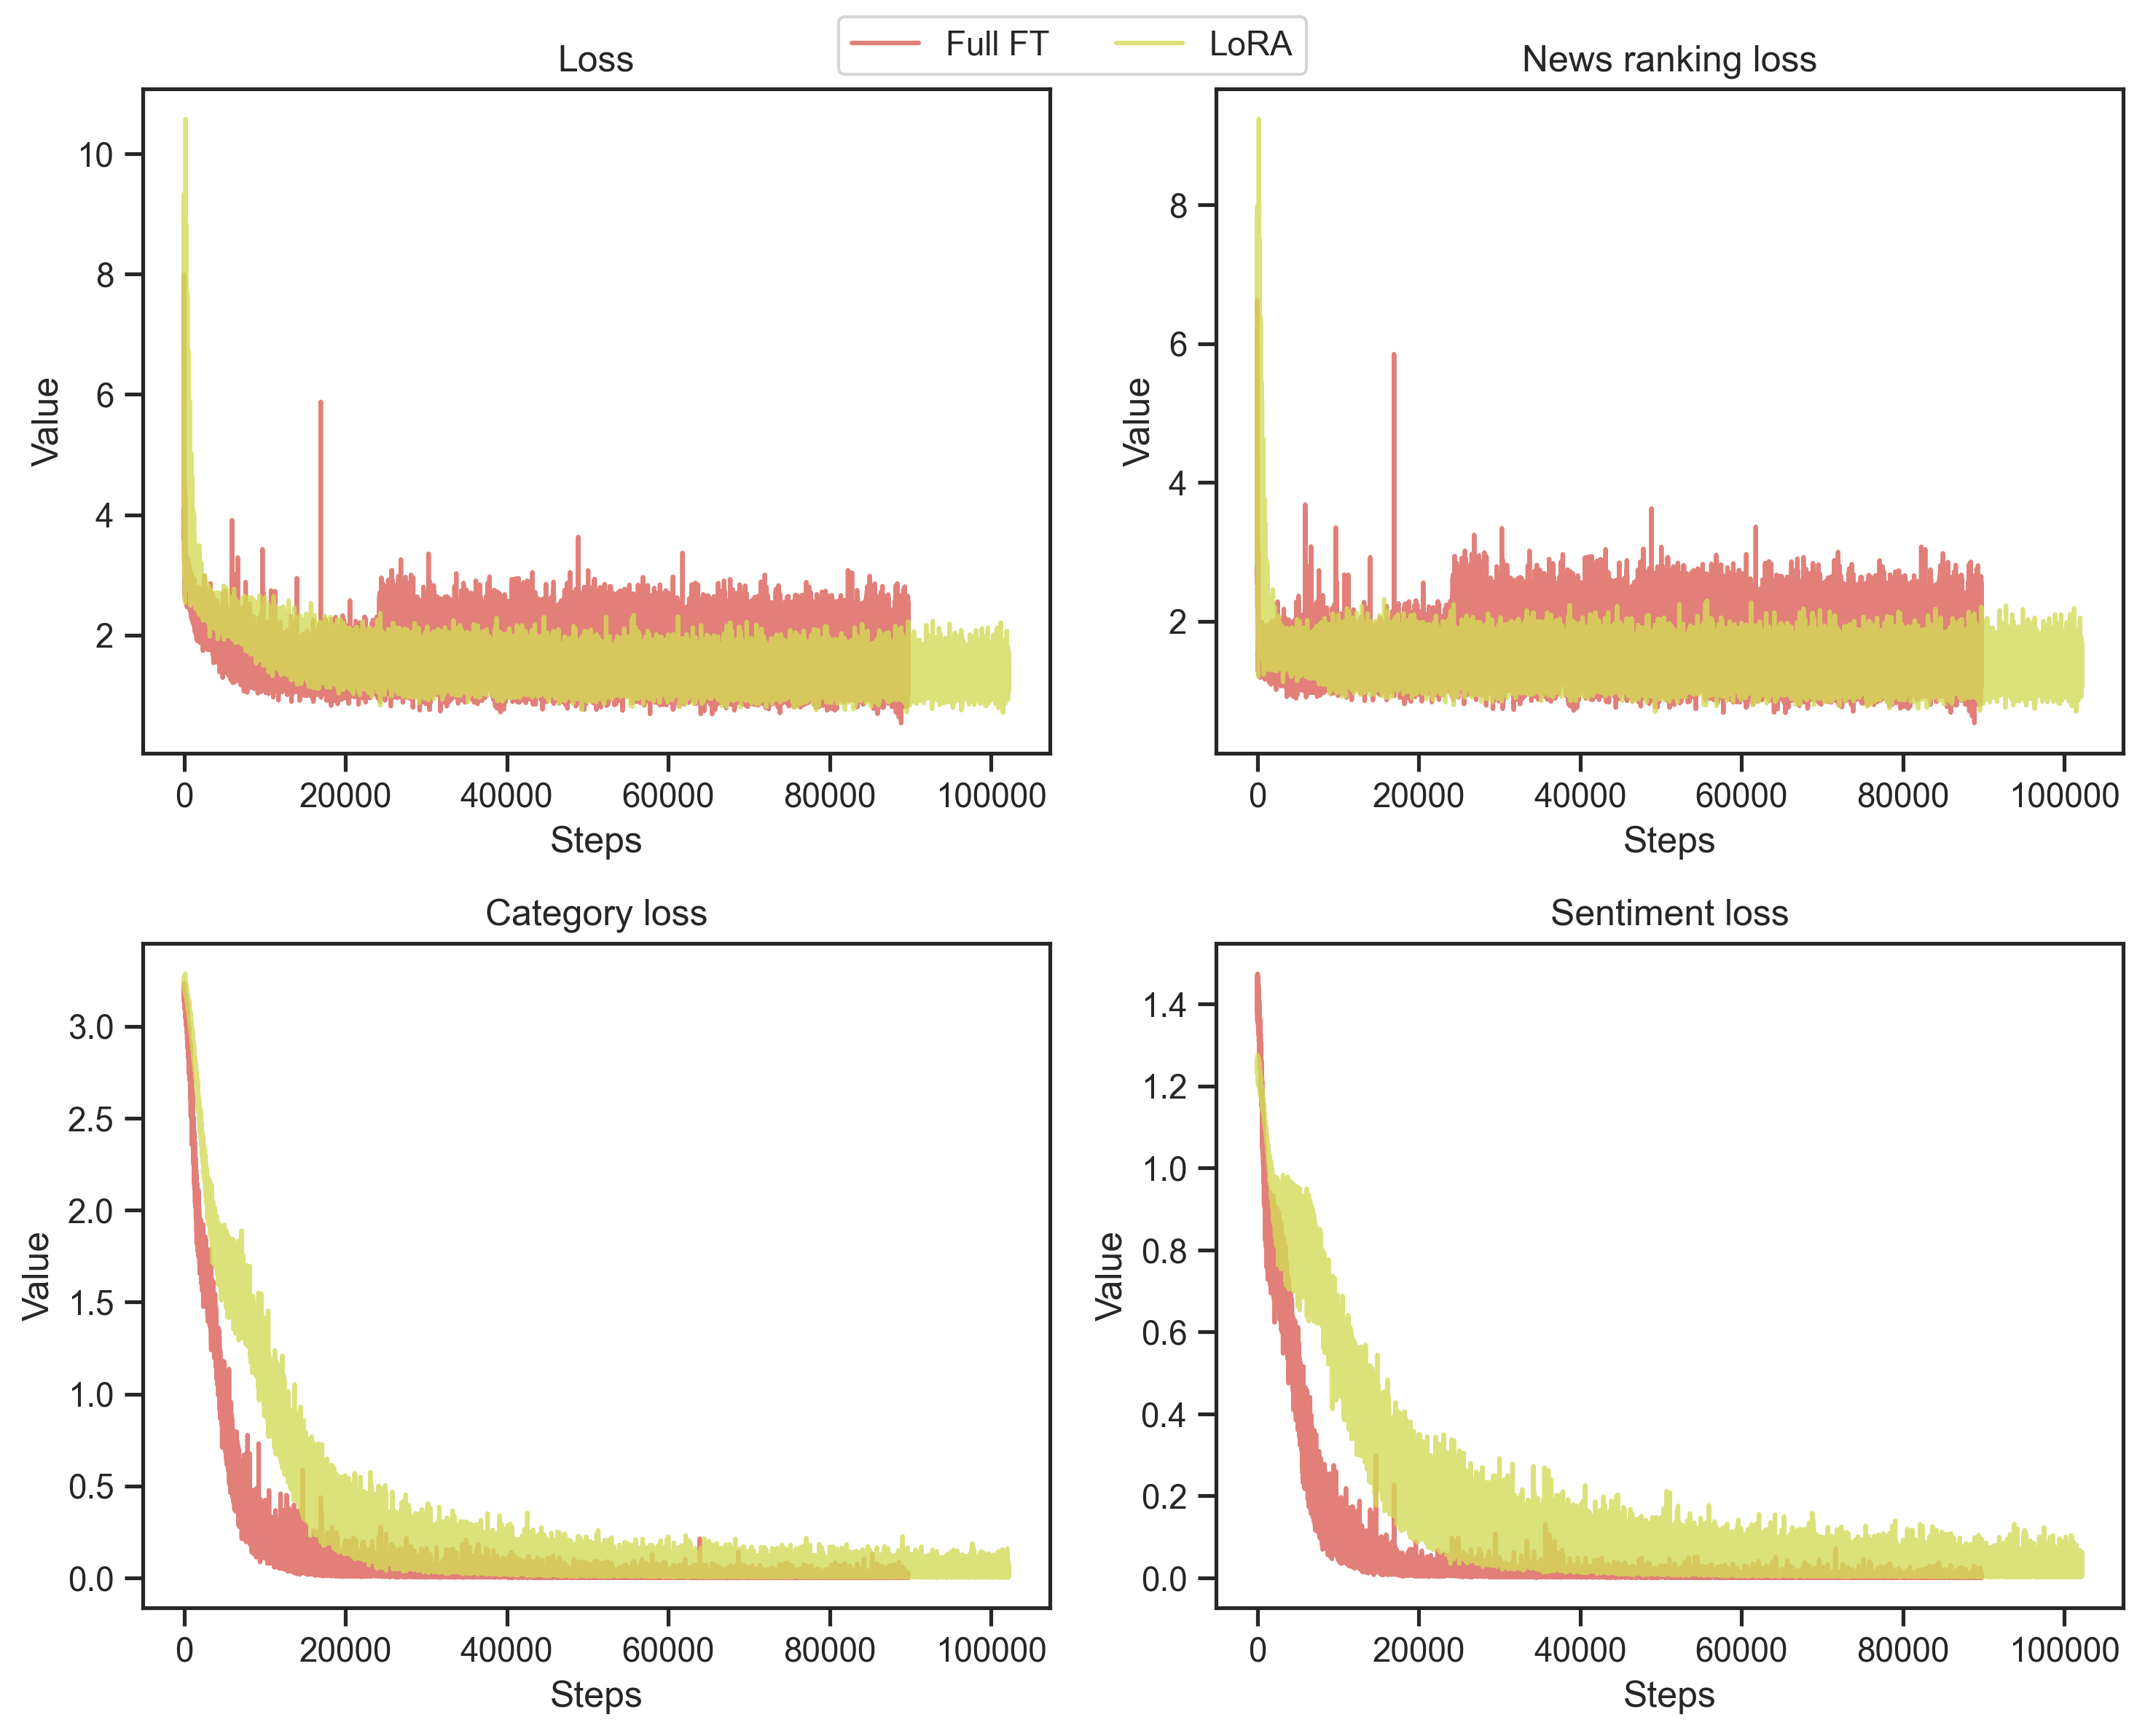

In [71]:
sns.set_palette("hls", 6)

tags = [
    'train/loss',
    'train/news_ranking_loss',
    'train/category_loss',
    'train/sentiment_loss'
]

fig, axs = plt.subplots(2,2, figsize=(10,8))

for event in events:

    metrics = {
        tag: np.array([ev.value for ev in events[event].Scalars(tag)]) for tag in tags
    }

    for i, (tag, values) in enumerate(metrics.items()):
        axs.flat[i].plot(values, label=event, alpha=0.8)
        axs.flat[i].set(xlabel='Steps', ylabel='Value', 
                           title=tag.split('/')[-1].replace('_', ' ').capitalize())


# Collecting handles and labels
handles, labels = [], []
for ax in axs.flat:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:  # Check for duplicates
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='upper center', ncol=len(labels))
fig.tight_layout()
fig.savefig('plots/train_loss.pdf')

